# "The Gadget Junction" -from our shop to your doorstep.
Electronic Shop

In [1]:
#importing the libraries required.

import pandas as pd                  #dataframe operations
import numpy as np                   #numerical calc.
import matplotlib.pyplot as plt      #visualization
import seaborn as sns                #visualization
import scipy.stats as stats          #statistical Calculations
import squarify                      #treemap visualization

import warnings
warnings.filterwarnings('ignore')    #ignore warnings.

plt.rcParams['figure.figsize'] = (12, 8)  #default set of figure size
sns.set_style('darkgrid')                 #default Style 

In [2]:
#reads the dataset of different products using pandas.
df=pd.read_csv("edaprojectdataset.csv") 
df.head(10)   #first 10 rows of our dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


## Basic EDA needs to be performed :

In [3]:
df.shape

(373700, 6)

In [4]:
#checks the null values
df.isnull().sum()

#Here we have 1090 null values in each column so there is a high chance that these are in a row where every values is null.

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [5]:
#deletes all the null values we have after looking at it by df[df.isnull()] 
df.dropna(inplace=True)

In [6]:
#info. of the dataset
df.info()

#Here every data type is object data type, we need to convert this into other data type as per our requirement.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


In [7]:
#dupliated values in the dataset which is not required to be there so we delete these after seeing some records of it.
df[df.duplicated()]

#We can see here even strings are repeeated in the rows which is of no use so we delete these duplicates.(Redundant data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
#deletes duplicates using drop function
df.drop_duplicates(inplace=True)

In [9]:
#shape of dataset after dropping duplicate data.
print(df.shape)

#this is fresh data free of nulls and duplicates containing 185687 rows with 6 columns.

(185687, 6)


In [10]:
#number of unique values in each feature
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [11]:
#what different products are available in the store
df.Product.unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', 'Product'], dtype=object)

Converting object data type to numeric and datetime data type:

In [12]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

#converting object to datetime and error parsed/invalid data points are set to NAN values.

In [13]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],errors='coerce') 

#converting object to numeric and error parsed/invalid data points are set to NAN values.

In [14]:
df['Price Each']=pd.to_numeric(df['Price Each'],errors='coerce') 

#converting object to numeric and error parsed/invalid data points are set to NAN values.

In [15]:
#again checks the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185687 non-null  object        
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [16]:
#checks the null values
df.isna().sum() 

#we already have dropped null values but after conversion of data type invalid entries create few more null values in dataset.

Order ID            0
Product             0
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    0
dtype: int64

In [17]:
#again dropping nulls & storing to actual dataset
df.dropna(inplace=True)
df.isna().sum()

#free from any nan values in our dataset

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Looking again at our dataset  

In [18]:
df.head(3)
#dataset top 3 entries

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"


In [19]:
df.tail(3)#dataset bottom 3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1.0,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001"


In [20]:
df.shape
#shape od data

(185686, 6)

## Checking for Outliers in the dataset and removal of outliers using Z score.

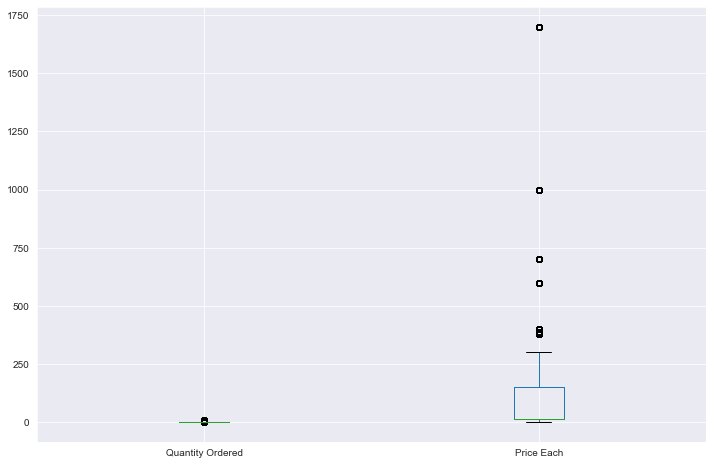

In [21]:
df.boxplot();
#boxplot to see outliers

In [22]:
data=df[['Price Each']]  #parsing the price column to z score calculator
z_scores = stats.zscore(data) #parsing only price column as it has very large difference in max and min
abs_z_scores = np.abs(z_scores) #taking absolute values
df1=df[(abs_z_scores < 3).all(axis=1)]  #filtering out all values till -3 to +3
df1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1.0,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1.0,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1.0,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1.0,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1.0,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016"


In [23]:
df.shape
#before removing outliers

(185686, 6)

In [24]:
df1.shape
#after removing outliers

(180965, 6)

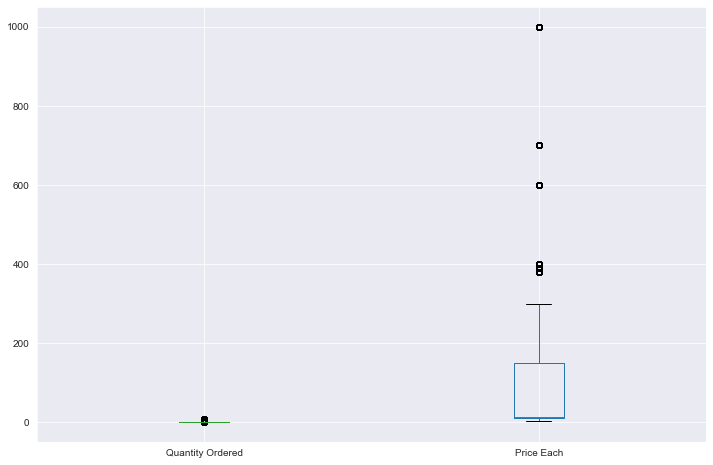

In [25]:
df1.boxplot();
#boxplot to see outliers ,though this shows some outliers but we can tolerate this much.

In [26]:
df1.describe()
#describe function for numerical columns

,Quantity Ordered,Price Each
count,180965.000000,180965.000000
mean,1.127771,144.983519
std,0.448330,228.464713
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,999.990000


In [27]:
# split column and add new columns to data or extract city ,state from purchase address 

df1[['Street', 'City', 'State']] = df1['Purchase Address'].str.split(',', expand=True)

# display the dataframe
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA 94016
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA 90001
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA 98101
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX 75001


In [28]:
df1.drop('Purchase Address',axis=1,inplace=True)
#dropping this column which is of no need now

In [29]:
df1.head(2) #a watchout of 2 rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035


In [30]:
#extracting state, city, pin from the state column created above

df1[['State','Zipcode']]=df1['State'].str.split(expand=True) 
                                   #extracting state, city, pin
df1.head() #top 5 entries

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,State,Zipcode
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA,02215
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR,97035
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA,94016
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA,90001
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX,73301


In [31]:
df1.drop(['Street','Zipcode'],axis=1,inplace=True)
#dropping unwanted columns as these are not of much importance.

In [32]:
#final dataset to work on.
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,MA
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,OR
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco,CA
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles,CA
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,Austin,TX


In [33]:
#calculating sales from price and units sold and creating a column
df1['Sales']=df1['Quantity Ordered']*df1['Price Each']

    #Sales Revenue = Units Sold x Sales Price. by this known formula we can calculate sales and add a column calculating sales
   
df1.head()#top 5 dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Sales
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,MA,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,OR,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles,CA,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,Austin,TX,11.99


#Top 5 Products which generates the most Sales Revenue

In [34]:
df1.groupby('Product')[['Sales']].sum().sort_values('Sales',ascending=False).head()

,Sales
Product,
iPhone,4792900.00
ThinkPad Laptop,4127958.72
Google Phone,3317400.00
27in 4K Gaming Monitor,2433147.61
34in Ultrawide Monitor,2352898.08


In [35]:
df1['Month'] = pd.to_datetime(df1['Order Date'], format='%m').dt.month_name().str.slice(stop=3)
                                                                #extracting month name from datetime column first 3 letters
df1['Day']=df1['Order Date'].dt.day_name()                      #extracting dayname of the transaction date
df1['shifts']=df1['Order Date'].dt.hour                         #extracting hour of the transaction

df1   #Final dataset good for analysis

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Sales,Month,Day,shifts
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,MA,700.00,Jan,Tuesday,21
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,OR,14.95,Jan,Monday,14
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco,CA,23.98,Jan,Thursday,13
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles,CA,149.99,Jan,Saturday,20
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,Austin,TX,11.99,Jan,Friday,11
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,San Francisco,CA,14.95,Dec,Wednesday,20
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,Los Angeles,CA,7.68,Dec,Sunday,12
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,Seattle,WA,400.00,Dec,Monday,6
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,Dallas,TX,11.99,Dec,Tuesday,10


In [36]:
df1.corr()
#correlation between different features which is not significant for any features.

,Quantity Ordered,Price Each,Sales,shifts
Quantity Ordered,1.000000,-0.170278,-0.157608,-0.002183
Price Each,-0.170278,1.000000,0.998873,0.001336
Sales,-0.157608,0.998873,1.000000,0.001279
shifts,-0.002183,0.001336,0.001279,1.000000


In [37]:
df1['Order ID'].duplicated().sum()

7059

In [38]:
#calculating monthly sales of the store:

MonthvsSales=df1.groupby('Month')[['Sales']].sum()     #grouping month wise total sales of that store.
MonthvsSales.reset_index(inplace=True)                 #setting the index again

In [39]:
MonthvsSales.sort_values('Sales',ascending=False)
#the new month vs sales dataset is here in order of hihest to lowest

,Month,Sales
2,Dec,3.515196e+06
10,Oct,2.842278e+06
0,Apr,2.617418e+06
9,Nov,2.449875e+06
8,May,2.361816e+06
7,Mar,2.160673e+06
5,Jul,2.020861e+06
6,Jun,1.971080e+06
1,Aug,1.734483e+06
3,Feb,1.730878e+06


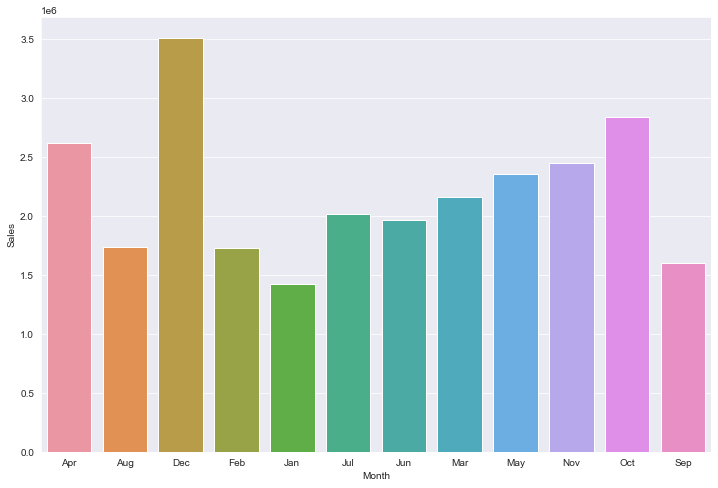

In [40]:
sns.barplot(x='Month',y='Sales',data=MonthvsSales);
#plotting monthly sales of the store

Inference: we can very well conclude that "December" has the highest sales because of the Christmas discount and January the lowest sales month probably because people usually go for outings & Picnic and not for shopping.

In [41]:
#city vs sales dataset for each city

CityvsSales=df1.groupby('City')[['Sales']].sum() #grouping city wise sales
CityvsSales.reset_index(inplace=True)            #reset index

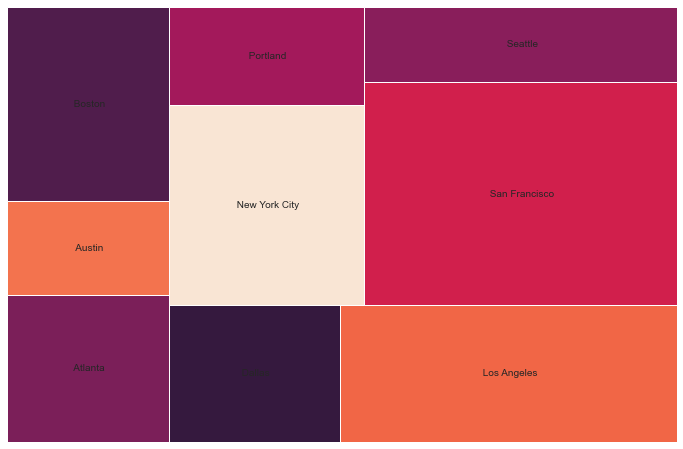

In [42]:
City=CityvsSales['City']  #labels for treemap
Sales=CityvsSales['Sales'] #numerical feature
squarify.plot(sizes=Sales,label=City); #treemap 
plt.axis('off');

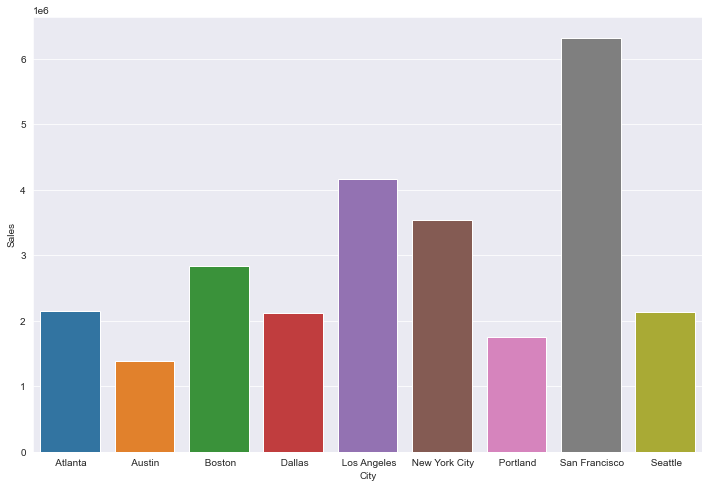

In [43]:
#Sales according to city -barplot 
sns.barplot(x='City',y='Sales',data=CityvsSales);

Inference: Here "San Francisco" is clear winner in Sales because of its popularity and easy reach and austin the lowest ,being on the outskirts of the city. One more thing is the socio-economic status of the city ,San Francisco has a higher status people usually buy iphones,laptops in more number from this city.



According to wiki: San Francisco is the 12th-largest metropolitan statistical area in the United States with 4.7 million residents, and the fourth-largest by economic output, with a GDP of $592 billion in 2019 which can be the reason of being the highest sales from there.
                        The reason for austin being the lowest is the less population also and major of students,govt employee etc and the socio-economic status.

In [44]:
#crosstab used for representing city and product with maximum products purchased
ctab=pd.crosstab(df1['City'],df1['Product'].max())
ctab.reset_index(inplace=True)     #reset index ctab 
ctab

col_0,City,iPhone
0,Atlanta,14484
1,Austin,9639
2,Boston,19423
3,Dallas,14416
4,Los Angeles,28814
5,New York City,24191
6,Portland,12112
7,San Francisco,43529
8,Seattle,14357


Total products purchased in San Francisco city is very high because of the population and socio-economic status.

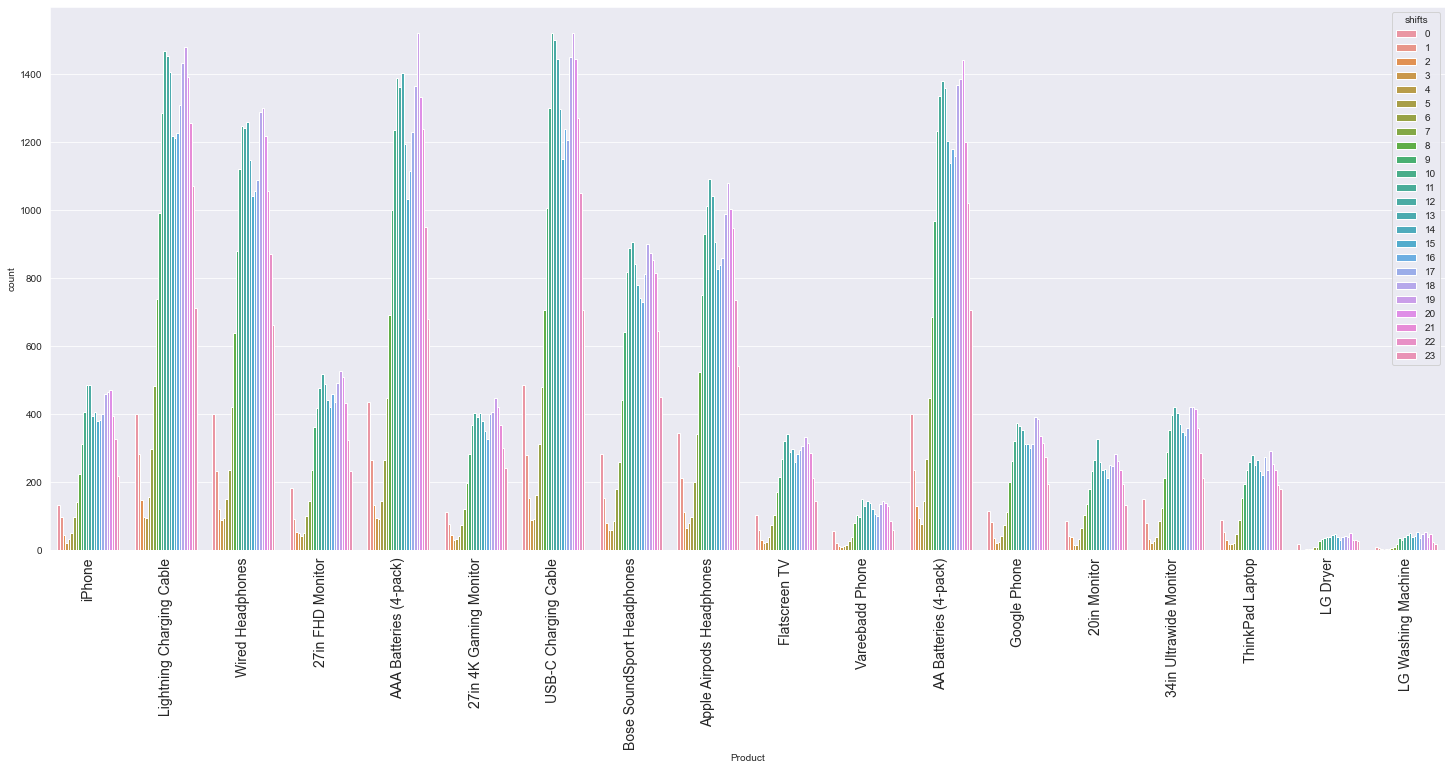

In [45]:
plt.figure(figsize=(25, 10))
sns.countplot(df1['Product'], hue=df1.shifts);                 #number of products count purchased in different time slots
plt.xticks(rotation='vertical',size=14);

In [46]:
df1.head(4) #dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Sales,Month,Day,shifts
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,MA,700.00,Jan,Tuesday,21
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,OR,14.95,Jan,Monday,14
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco,CA,23.98,Jan,Thursday,13
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles,CA,149.99,Jan,Saturday,20


In [47]:
shiftsvsSales=df1.groupby(by='shifts')[['Sales']].sum() #time of purchase and the sales on that time interval
shiftsvsSales.reset_index(inplace=True)
shiftsvsSales.head(8)

,shifts,Sales
0,0,565648.66
1,1,344963.90
2,2,173639.45
3,3,110042.94
4,4,126846.07
5,5,179664.87
6,6,351063.01
7,7,546867.32


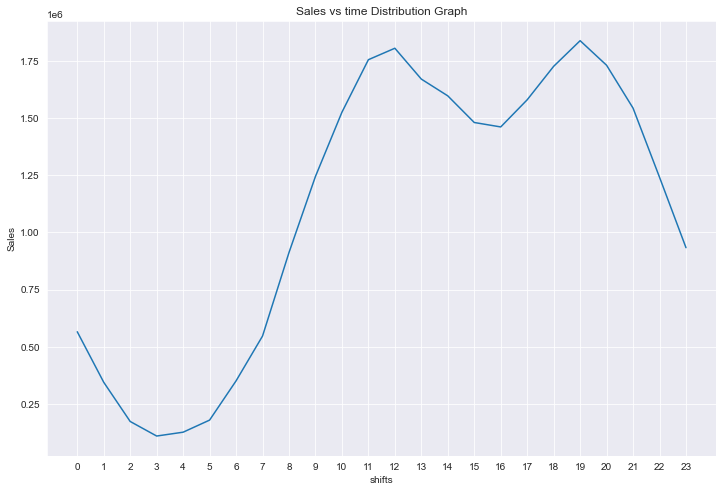

In [48]:
x=shiftsvsSales['shifts']#x as time of purchasing
y=shiftsvsSales['Sales']#y as sales
plt.title('Sales vs time Distribution Graph')#sales vs time graph
plt.grid(True)#shows grid 
plt.xlabel('shifts')#xlabel
plt.ylabel('Sales')#ylabel
plt.xticks(x)#x markings
plt.plot(x,y);#plot line

we can see that 7 Pm is the most busiest hour and peak time for sales mainly because people gets free from their office untill 6pm and 11-12 am is the second most sales peak time beacuse of morning people mainly housewives.

In [49]:
df2=df1[df1['Order ID'].duplicated(keep=False)]         #taking only the duplicate order id's for products
df2['prod_sold_together']=df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))    #joins the two products 
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Sales,Month,Day,shifts,prod_sold_together
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,Austin,TX,11.95,Jan,Monday,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,Austin,TX,11.99,Jan,Monday,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,Los Angeles,CA,150.00,Jan,Wednesday,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,Los Angeles,CA,11.52,Jan,Wednesday,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,New York City,NY,400.00,Jan,Thursday,11,"Vareebadd Phone,Wired Headphones"


In [50]:
# deleting the duplicates after joining to avoid redundant data in the above dataset in df2
df2=df2[['Order ID','prod_sold_together']].drop_duplicates()

In [51]:
df2.head()

,Order ID,prod_sold_together
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [52]:
data=df2['prod_sold_together'].value_counts().head(10)
df3=data.reset_index()
df3

,index,prod_sold_together
0,"iPhone,Lightning Charging Cable",886
1,"Google Phone,USB-C Charging Cable",857
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",304
5,"iPhone,Apple Airpods Headphones",286
6,"Google Phone,Bose SoundSport Headphones",161
7,"Vareebadd Phone,Wired Headphones",104
8,"Google Phone,USB-C Charging Cable,Wired Headph...",79
9,"Vareebadd Phone,Bose SoundSport Headphones",60


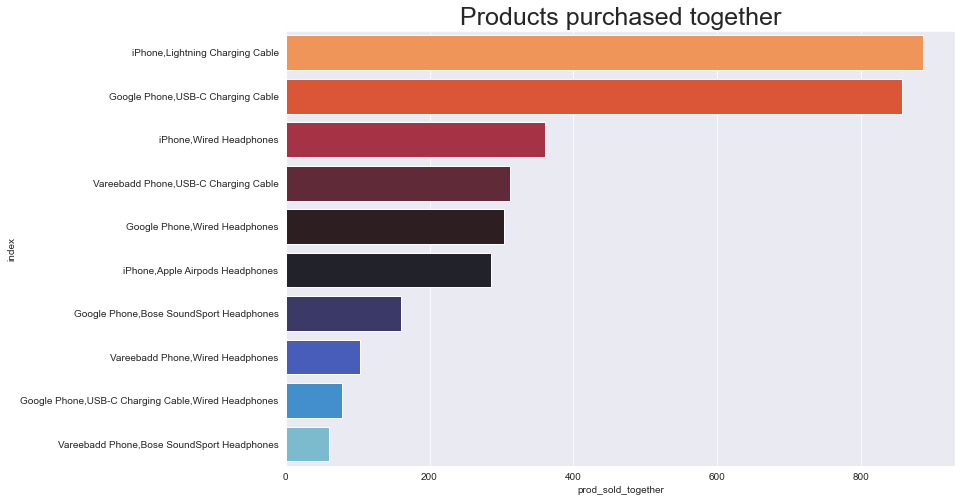

In [53]:
graph = sns.barplot(x='prod_sold_together', y='index',data=df3, palette= "icefire_r",saturation=0.97)
graph.set_title("Products purchased together", fontsize = 25);

inference: We can see that iphone,lightning charge cable solds the most together and second most is google phone and usb c charging cables ,so we can offer discount in the subsidiary part for better business and customer attraction.

In [54]:
df1.head(2)   #dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Sales,Month,Day,shifts
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,MA,700.00,Jan,Tuesday,21
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,OR,14.95,Jan,Monday,14


In [55]:
prod_group=df1.groupby('Product')[['Quantity Ordered']].sum()     #filtering the product using number of quantity ordered
prod_group.reset_index(inplace=True)                              #resets the index
prod_group.sort_values(by='Quantity Ordered',ascending=False).head(10) #sorting values with quantity ordered

#AAA Batteries(4-pack) is being the most sold product and is in high demand.

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986.0
4,AA Batteries (4-pack),27615.0
14,USB-C Charging Cable,23931.0
12,Lightning Charging Cable,23169.0
16,Wired Headphones,20524.0
6,Apple Airpods Headphones,15637.0
7,Bose SoundSport Headphones,13430.0
2,27in FHD Monitor,7541.0
17,iPhone,6847.0
1,27in 4K Gaming Monitor,6239.0


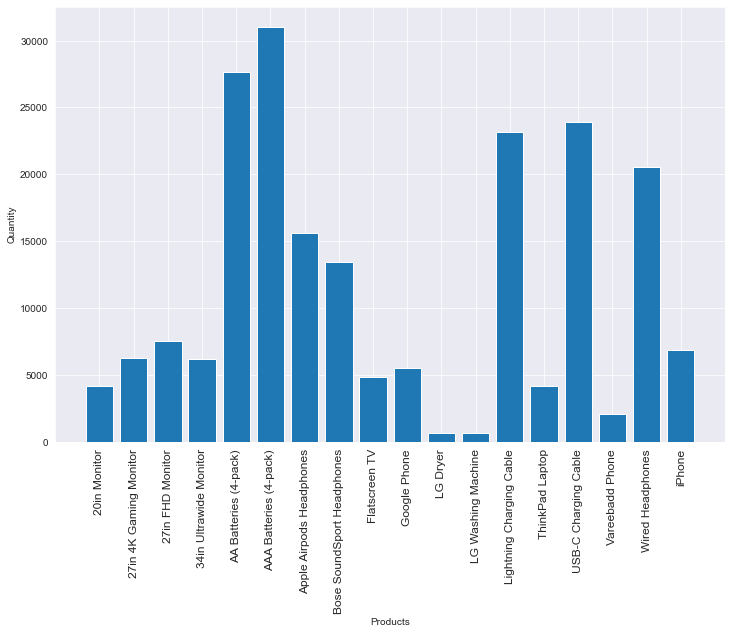

In [56]:
X=prod_group['Product']#x as product from the group by above
Y=prod_group['Quantity Ordered']#y as quantity ordered
plt.bar(x=X,height=Y); #barplot using the x and y
plt.xticks(rotation='vertical',size=12); #xticks and rotations
plt.xlabel('Products'); #xlabels 
plt.ylabel('Quantity'); #ylabels

we can see that the AAA batteries(4-pack) solds the most because of the shortage of electricity in city and the "LG products" are selling the least, 'products issue' might be the reason for this.

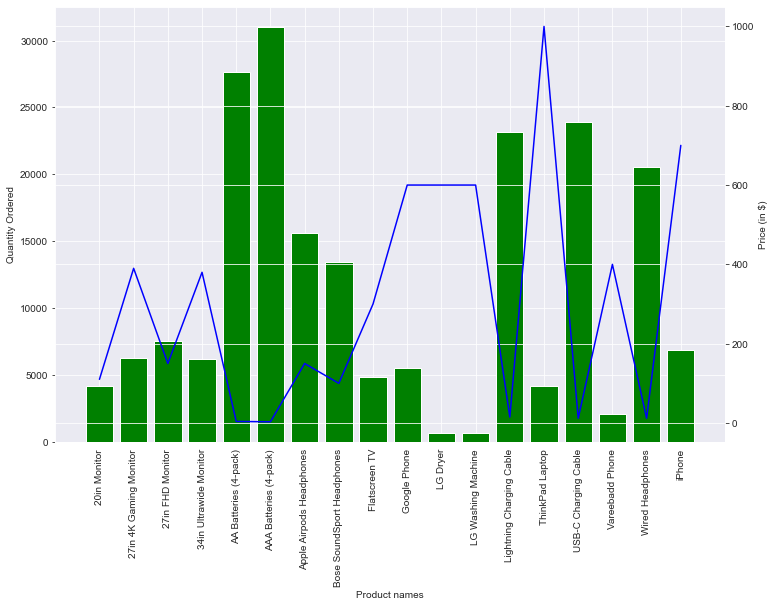

In [57]:
prices=df1.groupby('Product').mean()['Price Each'] #products with price mean 
fig,ax1=plt.subplots() #creating subplots in a graphs
ax2=ax1.twinx() #two plots 
ax1.bar(X,Y,color='g') #bar plot of the  product aand quantity
ax2.plot(X,prices,color='b') #lineplot of the product and prices
ax1.set_xlabel('Product names') #x label
ax1.set_ylabel('Quantity Ordered') #y label
ax2.set_ylabel('Price (in $)') #ylabel
ax1.set_xticklabels(X,rotation='vertical')
plt.show();

Here, thinkpad laptops price is too high and thats the reason for low sales comparatively others, Also AA and AAA batteries whose cost is very low sells the most because of the high demand ,shortage of electricity might be the reason.